<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Recomendando Música

El objetivo de este caso-taller es construir un sistema de recomendación de Música utilizando los datos de [Last.fm](https://www.last.fm/) provistos  abiertamente por [grouplens](https://grouplens.org/about/what-is-grouplens/) para: **"avanzar la teoría y la práctica de la computación social mediante la construcción y la comprensión de sistemas *(de recomendación)* utilizados por personas reales".**

Los datos contienen información sobre artistas, usuarios, y las veces que estos escucharon sus canciones. Las bases se encuentran en los `Archivos de Laboratorio` en la carpeta `data`, allí también está disponible un archivo [README](data/readme.txt) que contiene más información sobre las bases.


## Instrucciones generales

1. Para desarrollar el *cuaderno*, primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "Revisión por el compañero".

4. El archivo entregado debe poder ser ejecutado localmente por los pares. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1. Carga de datos 

En la carpeta `data` se encuentran los archivos:

   - `artists.dat`  que contienen el identificador del artista (`id`), nombre (`name`), link a la página del artista en last.fm (`url`), y link a la imagen del usuario (`pictureURL`), vale aclarar que varios de estos links están rotos. 
   - `user_artists.dat`  que contiene identificador del usuario (`userID`), nombre del artista que escuchó (`artistID`), y las veces que los escuchó (`weight`).

Cargue estos datos en su *cuaderno*:

   1. Para la base de artistas seleccione las columnas de identificador de artista (`id`) y nombre (`name`). Renombre estas columnas para poder hacer la unión con la base `user_artists.dat`.
   2. Para la base de usuarios y artistas, renombre las columnas de forma tal que se mantenga la consistencia para unir con la base anterior, y renombre la columna `weight` a `nro_reproducciones`.
   3. Una estas bases.
   

In [2]:
# Utilice este espacio para escribir el código.
# Cargamos las librerías a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:

a_cols = ['artistID', 'artistName']

artists = pd.read_csv('data/artists.dat', sep='\t', usecols=[0, 1], header=0, names=a_cols)
#encoding='latin-1')

artists.head()

,artistID,artistName
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest
3,4,Moi dix Mois
4,5,Bella Morte


In [4]:
ua_cols = ['userID','artistID', 'nro_reproducciones']

user_artists = pd.read_csv('data/user_artists.dat', sep='\t', header=0, names=ua_cols)
#encoding='latin-1')

user_artists.head()

,userID,artistID,nro_reproducciones
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [5]:
# Unir las bases
df = pd.merge(user_artists, artists, on='artistID', how='inner')
df.head()

,userID,artistID,nro_reproducciones,artistName
0,2,51,13883,Duran Duran
1,4,51,228,Duran Duran
2,27,51,85,Duran Duran
3,28,51,10,Duran Duran
4,62,51,528,Duran Duran


In [6]:
df.shape

(92834, 4)

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 2. Análisis preliminar. 

En esta sección exploraremos la base. Para ello responda las siguientes preguntas.

#### 2.1 ¿Cuantos usuarios y artistas hay en la base?


In [8]:
num_user = df['userID'].nunique()
num_artists = df['artistID'].nunique()

total_artists= artists['artistID'].nunique()

print(f"El numero de usuarios es: {num_user}")
print(f"El numero total de artistas es: {total_artists}")

El numero de usuarios es: 1892
El numero total de artistas es: 17632



#### 2.2 ¿Cuáles es la distribución de probabilidad del consumo por artista? (haga el calculo sin ponderar y ponderando por el numero de reproducciones) ¿Qué podemos inferir a partir de la comparación de ambas?

In [9]:
# Utilice este espacio para escribir el código.
prob_sin_ponderar_df = df['artistID'].value_counts().reset_index() # contamos el numero de veces que aparece un artista
prob_sin_ponderar_df.columns = ['artistID', 'prob_sin_ponderar']
prob_sin_ponderar_df['prob_sin_ponderar'] = prob_sin_ponderar_df['prob_sin_ponderar']/len(df)

In [11]:
prob_sin_ponderar_df.head()

,artistID,prob_sin_ponderar
0,89,0.006582
1,289,0.005623
2,288,0.005214
3,227,0.005171
4,300,0.005095


In [12]:
total_reproducciones = df['nro_reproducciones'].sum()  # Total reproducciones
reproducciones_per_artist = df.groupby('artistID')['nro_reproducciones'].sum() # Reproducciones por artista
prob_ponderada = reproducciones_per_artist / total_reproducciones  # Distribución de probabilidad ponderada
prob_ponderada_df = prob_ponderada.reset_index(name='prob_ponderada')

In [13]:
artists = artists.merge(prob_sin_ponderar_df, on='artistID', how='left')
artists = artists.merge(prob_ponderada_df, on='artistID', how='left')

artists.head()

,artistID,artistName,prob_sin_ponderar,prob_ponderada
0,1,MALICE MIZER,0.000032,0.000011
1,2,Diary of Dreams,0.000129,0.000116
2,3,Carpathian Forest,0.000032,0.000011
3,4,Moi dix Mois,0.000022,0.000008
4,5,Bella Morte,0.000022,0.000013


In [18]:
#Artistas con mayor probabilidad ponderada
artists.sort_values(by='prob_ponderada', ascending=False).head(10)

,artistID,artistName,prob_sin_ponderar,prob_ponderada
283,289,Britney Spears,0.005623,0.034591
66,72,Depeche Mode,0.003038,0.018809
83,89,Lady Gaga,0.006582,0.018666
286,292,Christina Aguilera,0.004384,0.015298
492,498,Paramore,0.004298,0.013926
61,67,Madonna,0.004621,0.013315
282,288,Rihanna,0.005214,0.013087
695,701,Shakira,0.003436,0.009952
221,227,The Beatles,0.005171,0.009570
294,300,Katy Perry,0.005095,0.007698


In [19]:
#Artistas con mayor probabilidad sin ponderar
artists.sort_values(by='prob_sin_ponderar', ascending=False).head(10)

,artistID,artistName,prob_sin_ponderar,prob_ponderada
83,89,Lady Gaga,0.006582,0.018666
283,289,Britney Spears,0.005623,0.034591
282,288,Rihanna,0.005214,0.013087
221,227,The Beatles,0.005171,0.009570
294,300,Katy Perry,0.005095,0.007698
61,67,Madonna,0.004621,0.013315
327,333,Avril Lavigne,0.004492,0.007601
286,292,Christina Aguilera,0.004384,0.015298
184,190,Muse,0.004309,0.007011
492,498,Paramore,0.004298,0.013926


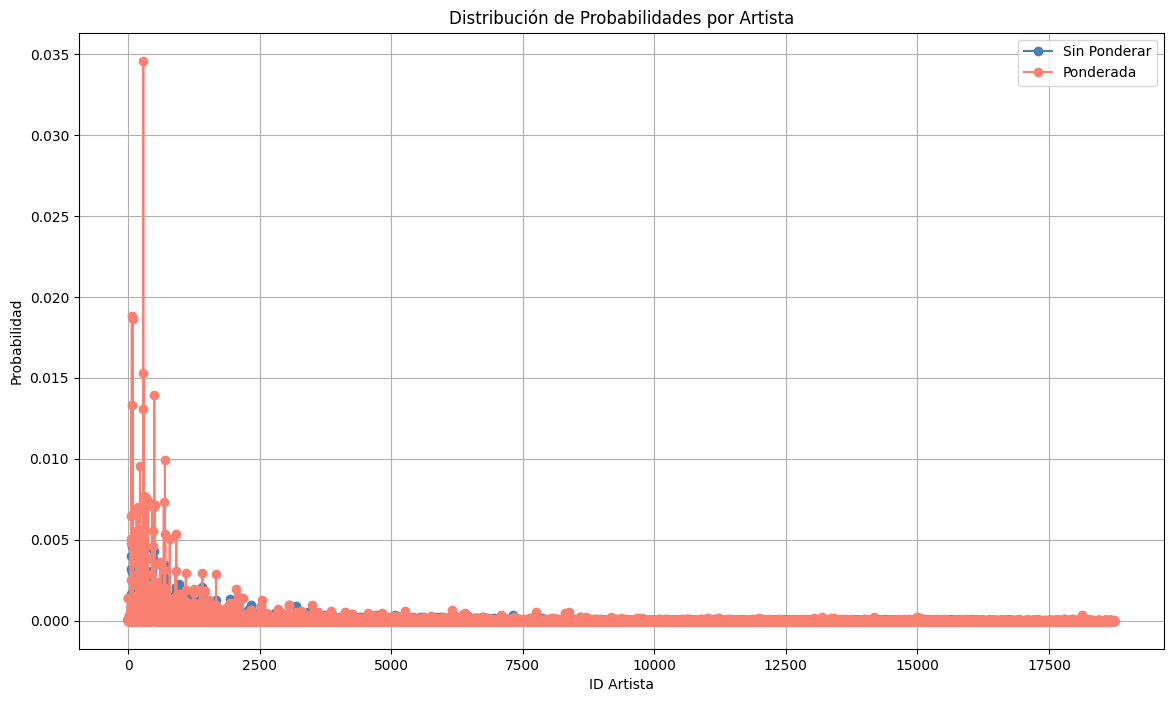

In [14]:
# Comparación probabilidades


plt.figure(figsize=(14, 8))

plt.plot(artists['artistID'], artists['prob_sin_ponderar'], marker='o', label='Sin Ponderar', color='steelblue')
plt.plot(artists['artistID'], artists['prob_ponderada'], marker='o', label='Ponderada', color='salmon')

plt.xlabel('ID Artista')
plt.ylabel('Probabilidad')
plt.title('Distribución de Probabilidades por Artista')
plt.legend()
plt.grid(True)
plt.show()

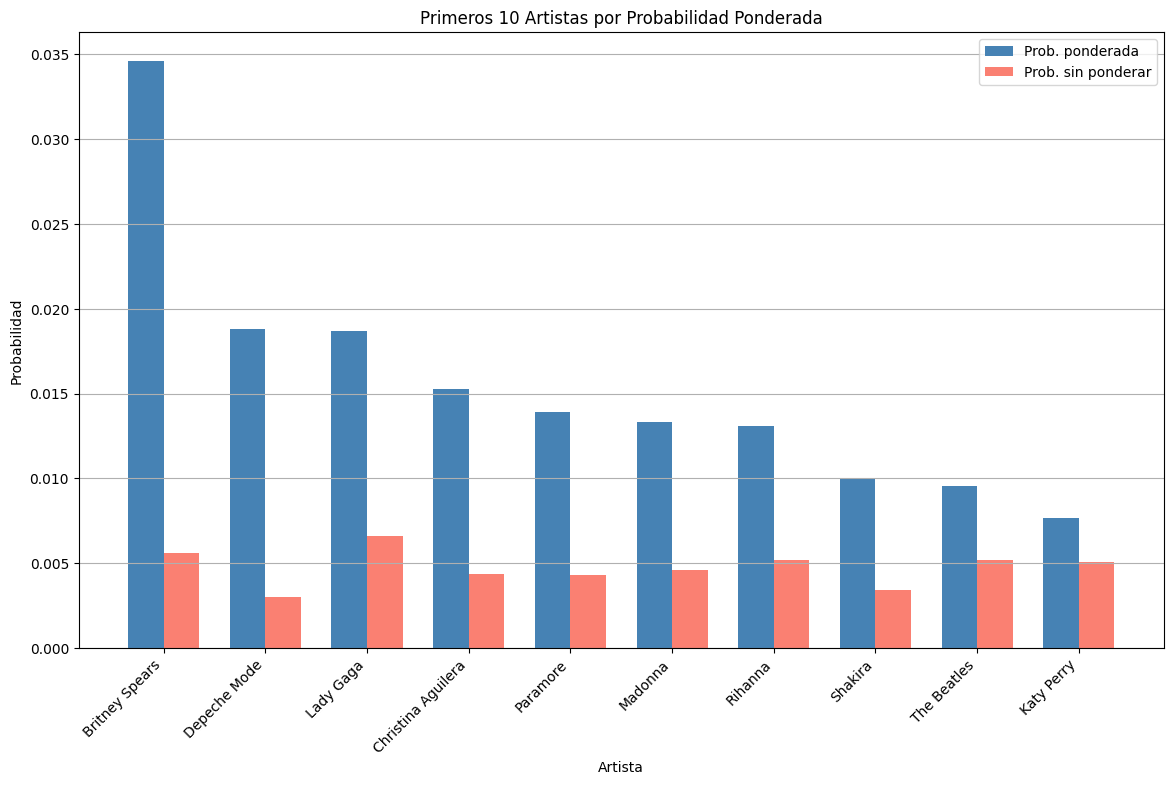

In [22]:
top_10_artists = artists.sort_values(by='prob_ponderada', ascending=False).head(10)

plt.figure(figsize=(14, 8))

# barras agrupadas
bar_width = 0.35
index = range(len(top_10_artists))

# prob_sin_ponderar
plt.bar(index, top_10_artists['prob_ponderada'], bar_width, label='Prob. ponderada', color='steelblue')

# prob_ponderada
plt.bar([i + bar_width for i in index], top_10_artists['prob_sin_ponderar'], bar_width, label='Prob. sin ponderar', color='salmon')

plt.xlabel('Artista')
plt.ylabel('Probabilidad')
plt.title('Primeros 10 Artistas por Probabilidad Ponderada')
plt.xticks([i + bar_width / 2 for i in index], top_10_artists['artistName'], rotation=45, ha='right')
plt.legend()
plt.grid(True, axis='y')

plt.show()

De esta manera podemos ver por el id artista que la prob ponderada es mas alta que sin ponderar

Lo que podemos inferir a partir de la comparacion entre las probabilidades ponderada y sin ponderar es que la probabilidad ponderada por el número de reproducciones ajusta la probabilidad original (sin ponderar) para reflejar el impacto de la popularidad o el volumen de reproducciones. Si un artista tiene muchas reproducciones, su probabilidad ponderada será más alta en comparación con su probabilidad sin ponderar, y viceversa. En el caso de artistas con menos reproducciones, como vemos en el ejemplo de MALICE MIZER, Carpathian Forest y Moi dix Mois, la probabilidad ponderada es más baja que la probabilidad sin ponderar. Esto indica que, aunque tengan cierto peso en términos de frecuencia o presencia en los datos sin considerar las reproducciones, son menos populares cuando se tiene en cuenta el número de veces que sus canciones han sido escuchadas.

 La diferencia entre ambas probabilidades también nos permite comparar la popularidad relativa de los artistas. Si la probabilidad ponderada es mucho más baja que la sin ponderar, esto indica que el artista, aunque presente en la muestra, tiene un menor número de reproducciones en comparación con otros. Por el contrario, una probabilidad ponderada más cercana a la sin ponderar sugiere una mayor popularidad.

#### 2.3 Para el usuario 8 (`userID==8`) ¿cuál es la distribución de reproducción de artistas basado en el número de reproducciones relativas?. Presente sus resultados usando tablas y/o gráficas. ¿Encuentra algún patrón en los artistas que escucha y las veces que reproduce? ¿Podemos decir algo de sus preferencias?


In [23]:
# Utilice este espacio para escribir el código.
df_8 = df[df['userID'] == 8].copy()
df_8.head()

,userID,artistID,nro_reproducciones,artistName
1975,8,71,181,Dido
2752,8,89,921,Lady Gaga
3453,8,97,354,Duffy
11322,8,251,235,Whitney Houston
11423,8,257,479,Mariah Carey


In [24]:
total_reproducciones_8 = df_8['nro_reproducciones'].sum()  # Total reproducciones
df_8.loc[:,'porcentaje rep/total'] = df_8['nro_reproducciones']/total_reproducciones_8
df_8 = df_8 .sort_values(by='porcentaje rep/total', ascending=False)
df_8.head(10)

,userID,artistID,nro_reproducciones,artistName,porcentaje rep/total
18981,8,334,6291,No Angels,0.173406
18986,8,335,2396,Sandy,0.066044
12634,8,289,2258,Britney Spears,0.062240
18988,8,336,1735,Vanessa Petruo,0.047824
14200,8,295,1425,Beyoncé,0.039279
18989,8,337,1407,Alexander,0.038783
14597,8,296,1039,Sugababes,0.028639
18990,8,338,963,Queensberry,0.026544
2752,8,89,921,Lady Gaga,0.025387
18992,8,339,819,Fady Maalouf,0.022575


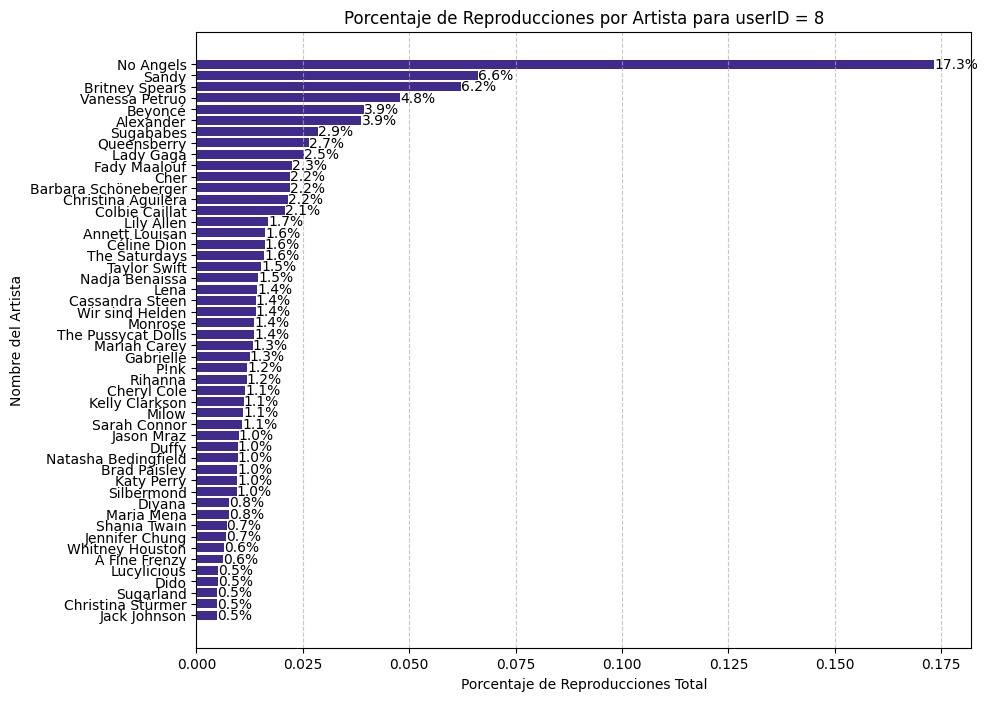

In [30]:
df_8_sorted = df_8.sort_values(by='porcentaje rep/total', ascending=True)

plt.figure(figsize=(10, 8))

# Crear el gráfico de barras horizontales
plt.barh(df_8_sorted['artistName'], df_8_sorted['porcentaje rep/total'], color='#402B8C')

# Configurar etiquetas y título
plt.xlabel('Porcentaje de Reproducciones Total')
plt.ylabel('Nombre del Artista')
plt.title('Porcentaje de Reproducciones por Artista para userID = 8')

# Mostrar los valores en las barras en formato de porcentaje
for index, value in enumerate(df_8_sorted['porcentaje rep/total']):
    plt.text(value, index, f'{value*100:.1f}%', va='center', ha='left')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 3. Generando Recomendaciones

En esta sección nos interesa generar recomendaciones ***nuevas y relevantes*** para el usuario 8 (`userID==8`). Para ello vamos a generar distintos sistemas de recomendación y comparar las recomendaciones generadas.

#### 3.1. Filtrado colaborativo sencillo: promedios simples.

Usando el promedio simple basado en el número de usuarios que escucha un artista (sin considerar el número de veces que estos usuarios reproducen al artista) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones.

In [31]:
# Utilice este espacio para escribir el código.
# Paso 1: Calcular el número de usuarios únicos que escuchan cada artista
user_artist_count = df.groupby('artistID')['userID'].nunique().reset_index()
user_artist_count.columns = ['artistID', 'num_users']

# Paso 2: Filtrar los artistas que ya ha escuchado el usuario 8
# (Aquí asumimos que el usuario 8 no está en el DataFrame de reproducciones, si estuviera, podríamos filtrarlo)
# Primero, necesitamos simular algunos datos para el usuario 8 para ilustrar
# Vamos a usar el DataFrame 'df' dado para la simulación y asumir que solo tiene una interacción con un artista

# Paso 3: Unir con la lista de artistas para obtener nombres
recommendations = user_artist_count.merge(artists[['artistID', 'artistName']], on='artistID', how='left')

# Eliminar artistas que el usuario ya ha escuchado (simulación: supongamos que el usuario 8 ya escuchó el artista con artistID = 4)
user_8_listened_artists = [4]
recommendations = recommendations[~recommendations['artistID'].isin(user_8_listened_artists)]

# Ordenar por número de usuarios
recommendations = recommendations.sort_values(by='num_users', ascending=False).head(10)

print(recommendations[['artistName', 'num_users']])

             artistName  num_users
83            Lady Gaga        611
283      Britney Spears        522
282             Rihanna        484
221         The Beatles        480
294          Katy Perry        473
61              Madonna        429
327       Avril Lavigne        417
286  Christina Aguilera        407
184                Muse        400
492            Paramore        399


(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.2.  Filtrado colaborativo sencillo: promedios ponderados.

Usando el promedio ponderado basado en el número de usuarios que escucha un artista  y ponderando  por el número de veces que estos usuarios reproducen al artista (`nro_reproducciones`) genere una tabla y/o gráfica con 10 recomendaciones de artistas para este usuario. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.


In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.3.  Filtrado colaborativo sencillo: similitud de coseno.

Usando el promedio ponderado de reproducciones genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario. Para generar los pesos utilice la distancia de coseno. Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en el paso anterior.

In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.4.  Filtrado colaborativo usando SVD


Usando la descomposición en valores singulares (SVD) genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores.


In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

#### 3.5.  Filtrado colaborativo usando Análisis de Canasta de Compra

Usando  el algoritmo `Apriori` genere una tabla y/o gráfica  con 10 recomendaciones de artistas para este usuario.  Explique con cuidado su procedimiento y justifique sus elecciones. Compare las recomendaciones con el sistema implementado en los pasos anteriores. Esto puede tomar mucho tiempo, sea cuidadoso al elegir los hiper-parámetors del modelo, utilice los resultados de las estadísticas descriptivas para elegir sus hiper-parámetros, y genere solo reglas con 2 elementos. (Puede también aprovechar los recursos de [Google Colab](https://colab.research.google.com/))


In [ ]:
# Utilice este espacio para escribir el código.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).

### 4. Recomendaciones generales 

De acuerdo con los resultados encontrados, en su opinión ¿qué procedimiento generó las mejores recomendaciones para este usuario? ¿Cómo implementaría una evaluación objetiva de estas recomendaciones? Justifique su respuesta.

(Utilice este espacio para describir el procedimiento, análisis y conclusiones).